In [1]:
from PIL import Image
import numpy as np
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

# statystyki

In [2]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("rms ", s.rms)  # pierwiastek średniokwadratowy 
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

tryb RGB
format PNG
rozmiar (200, 100)


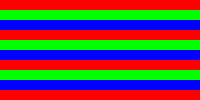

In [3]:
im = Image.open('pasy_3kolory.png')
print("tryb", im.mode)
print("format", im.format)
print("rozmiar", im.size)
w, h = im.size
im

In [4]:
def usrednij_obraz(obraz):  
    t  = np.asarray(obraz) 
    tab = t.copy() 
    srednie = t.mean(axis=(0, 1)).astype(np.uint8)
    print(srednie)
    for i in range(3):
        tab[:, :, i] = srednie[i]
    return Image.fromarray(tab)


im1 = usrednij_obraz(im)

[102  76  76]


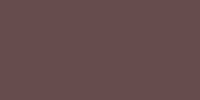

In [5]:
im1

In [6]:
statystyki(im)


extrema  [(0, 255), (0, 255), (0, 255)]
count  [20000, 20000, 20000]
mean  [102.0, 76.5, 76.5]
rms  [161.27616066858735, 139.66925216381736, 139.66925216381736]
median  [0, 0, 0]
stddev  [124.92397688194208, 116.85568022137392, 116.85568022137392]


In [7]:
statystyki(im1)

extrema  [(102, 102), (76, 76), (76, 76)]
count  [20000, 20000, 20000]
mean  [102.0, 76.0, 76.0]
rms  [102.0, 76.0, 76.0]
median  [102, 76, 76]
stddev  [0.0, 0.0, 0.0]


tryb RGB
format PNG
rozmiar (363, 432)


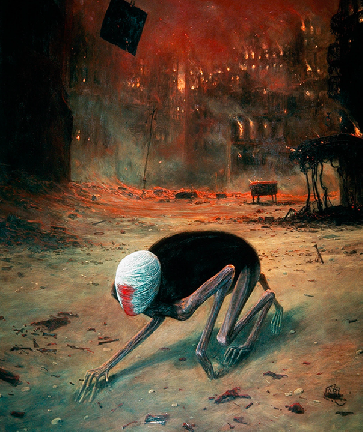

In [21]:
im2 = Image.open('beksinski.png')
print("tryb", im2.mode)
print("format", im2.format)
print("rozmiar", im2.size)
w, h = im2.size
im2

In [9]:
statystyki(im2)

extrema  [(0, 255), (0, 254), (0, 254)]
count  [156816, 156816, 156816]
mean  [92.12686843179267, 71.48291628405265, 51.6435121416182]
rms  [110.9660114614989, 86.19844015908052, 64.85120391220475]
median  [94, 67, 47]
stddev  [61.85544286984505, 48.17015430103693, 39.22532730954446]


# Histogram

In [10]:
def rysuj_histogram_RGB(obraz):
    hist = obraz.histogram()
    plt.title("histogram  ")
    plt.bar(range(256), hist[:256], color='r', alpha=0.5)
    plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
    plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
    plt.show()

def rysuj_histogram_L(obraz):
    hist = obraz.histogram()
    plt.title("histogram  ")
    plt.bar(range(256), hist[:])
    plt.show()

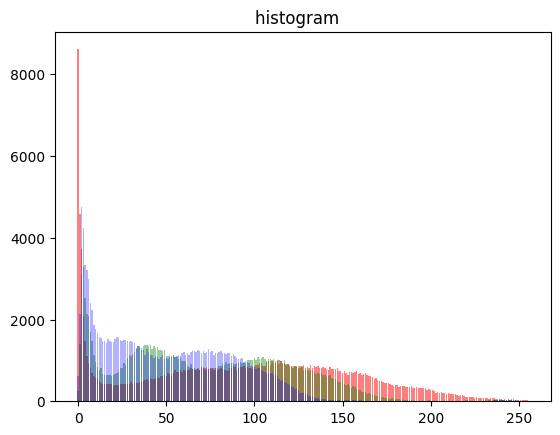

In [11]:
rysuj_histogram_RGB(im2)

Ile jest pikseli o wartości wybranego kanału równej podanej liczbie z zakresu od 0 do 255?

In [22]:
hist = im2.histogram()
print("kanał r ", hist[0])
print("kanał g ", hist[0+256])
print("kanał b ", hist[0+2*256] )

kanał r  8611
kanał g  247
kanał b  623


Ile jest pikseli o podanej wartości np. [216  121  74]  ?  Napisać funkcję zlicz_piksele.

# pobieranie kanałów obrazu 

In [13]:
# Kanały pobrane jako obrazy
r, g, b = im2.split()  # powstają obrazy
print("tryb kanału r: ", r.mode)
print("tryb kanału g: ", g.mode)
print("tryb kanału b: ", b.mode)

tryb kanału r:  L
tryb kanału g:  L
tryb kanału b:  L


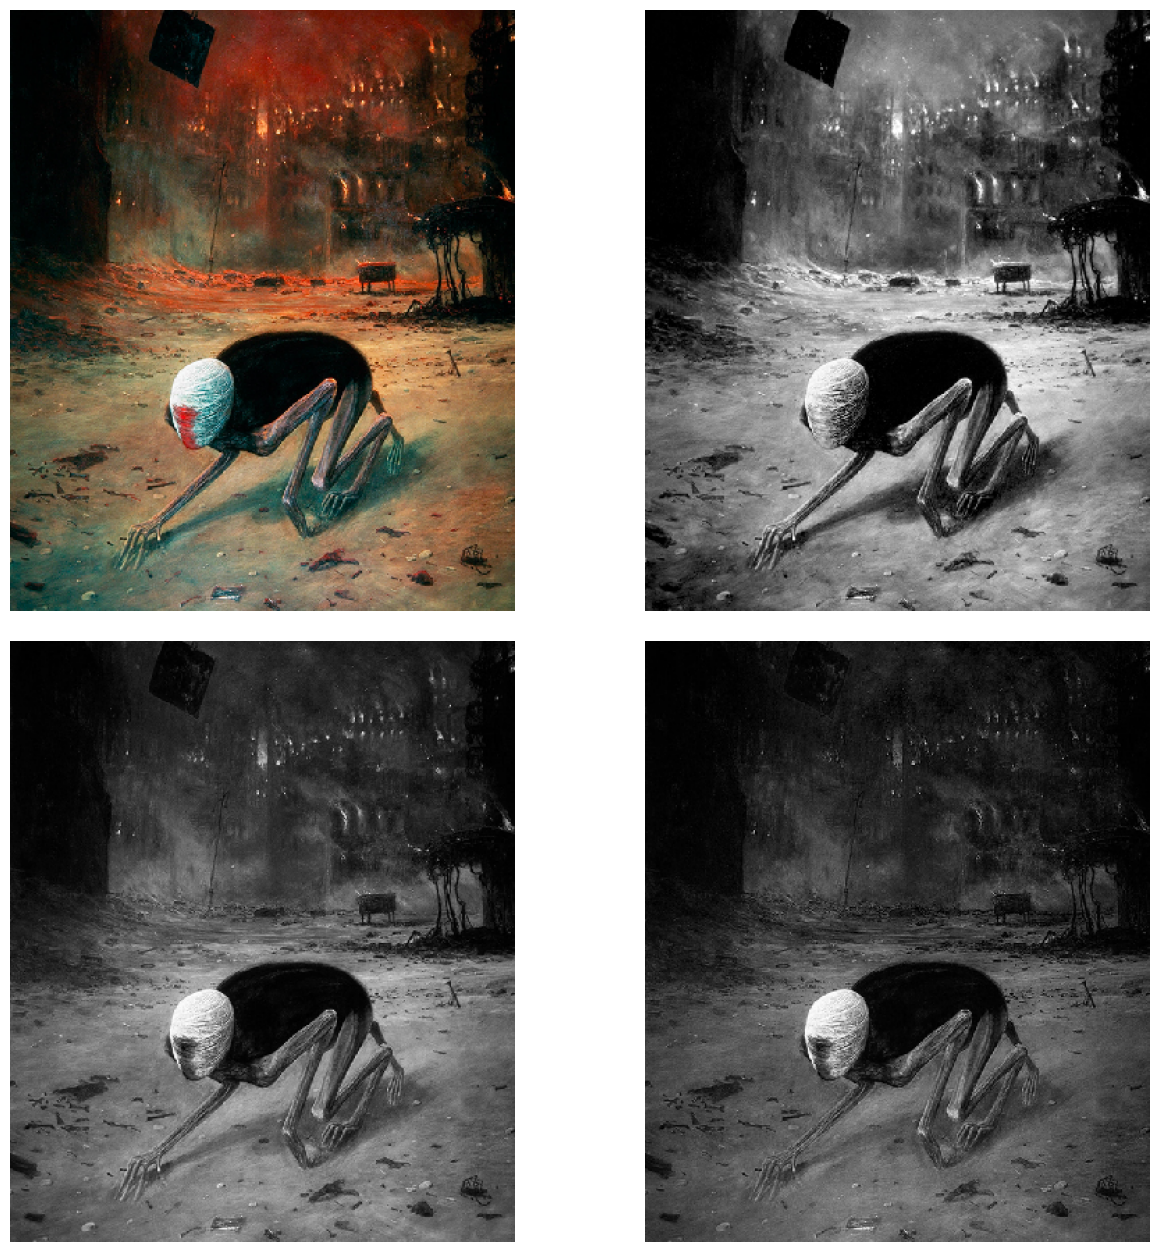

In [14]:
# przedstawienie 4 obrazów w jednym oknie plt
plt.figure(figsize=(16, 16))
plt.subplot(2,2,1) # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.imshow(im2)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(r, "gray")
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(g, "gray")
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(b, "gray")
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('figura1.png')
plt.show()

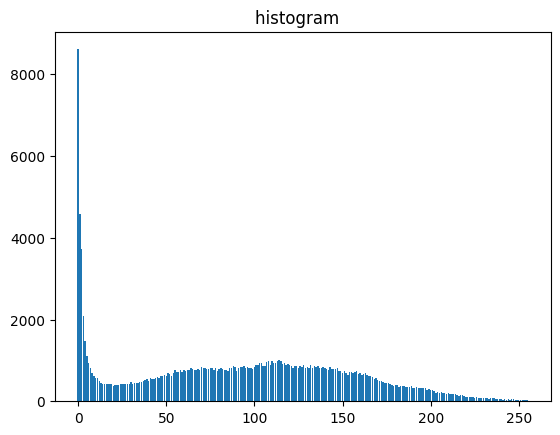

In [15]:
rysuj_histogram_L(r)

Łaczenie kanałow w jeden obraz RGB

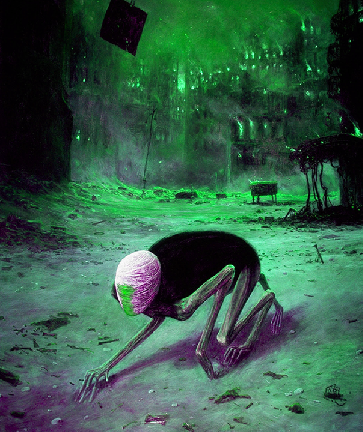

In [24]:
# efekt przestawienia  kanałow
im3 = Image.merge('RGB', (b, r, g))
im3

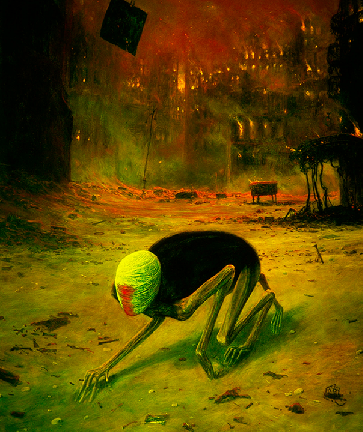

In [25]:
# własny obraz w trybie L jako kanał
w, h = im2.size
t = (h, w)
A = np.zeros(t, dtype=np.uint8)
A_im = Image.fromarray(A) # czarny obraz 
im4 = Image.merge('RGB', (r, g, A_im))
im4

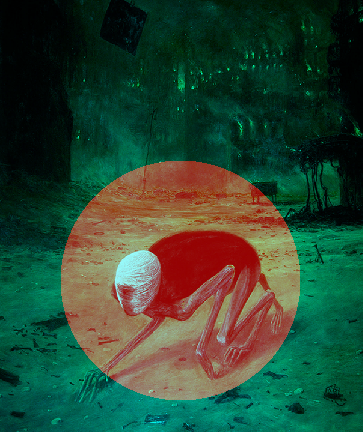

In [18]:
# własny obraz w trybie L jako kanał - drugi przykład
def rysuj_kolo(w, h, r, m, n, kolor, kolor_tla): # koło o promieniu r i środku m, n, kolor = 0 lub 255
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if (i-n)**2+(j-m)**2 < r**2: # wzór na koło o środku (m_s, n_s) i promieniu r
                tab[i, j] = kolor 
            else: 
                tab[i, j] = kolor_tla 
    return tab


kolo_im = Image.fromarray(rysuj_kolo(363, 432,120,180,280, 150, 0))
im5 = Image.merge('RGB', (kolo_im, g, b))
im5

# obraz pokazujący różnice

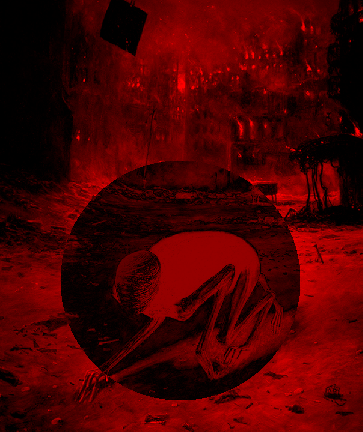

In [19]:
diff = ImageChops.difference(im2,im5)
diff

In [20]:
statystyki(diff)

extrema  [(0, 255), (0, 0), (0, 0)]
count  [156816, 156816, 156816]
mean  [74.16592056932966, 0.0, 0.0]
rms  [91.23367521236794, 0.0, 0.0]
median  [72, 0, 0]
stddev  [53.13190866945893, 0.0, 0.0]
